## PmagPy Online: Jupyter Notebooks, the PmagPy Software Package and the Magnetics Information Consortium (MagIC) Database

Lisa Tauxe$^1$, Rupert Minnett$^2$, Nick Jarboe$^1$, Catherine Constable$^1$, Anthony Koppers$^2$, Lori Jonestrask$^1$, Nick Swanson-Hysell$^3$

$^1$Scripps Institution of Oceanography, United States of America;  $^2$   Oregon State University; $^3$ University of California, Berkely; ltauxe@ucsd.edu

The Magnetics Information Consortium (MagIC), hosted at http://earthref.org/MagIC is a database that serves as a Findable, Accessible, Interoperable, Reusable (FAIR) archive for paleomagnetic and rock magnetic data. It has a flexible, comprehensive data model that can accomodate most kinds of paleomagnetic data. The **PmagPy** software package is a cross-platform and open-source set of tools written in Python for the analysis of paleomagnetic data that serves as one interface to MagIC, accommodating various levels of user expertise. It is available through github.com/PmagPy. Because PmagPy requires installation of Python, several non-standard Python modules, and the PmagPy software package, there is a speed bump for many practitioners on beginning to use the software. In order to make the software and MagIC more accessible to the broad spectrum of scientists interested in paleo and rock magnetism, we have prepared a set of Jupyter notebooks, hosted on [jupyterhub.earthref.org](https://jupyterhub.earthref.org) which serve a set of purposes. 1) There is a complete course in Python for Earth Scientists, 2) a set of notebooks that introduce PmagPy (pulling the software package from the github repository) and illustrate how it can be used to create data products and figures for typical papers, and 3) show how to prepare data from the laboratory to upload into the MagIC database. The latter will satisfy expectations from NSF for data archiving and for example the AGU publication data archiving requirements.




### Overview of   MagIC

 
The Magnetics Information Consortium (MagIC), hosted at http://earthref.org/MagIC is a database that serves as a Findable, Accessible, Interoperable, Reusable (FAIR) archive for paleomagnetic and rock magnetic data. Its data model is fully described here: [https://www2.earthref.org/MagIC/data-models/3.0](https://www2.earthref.org/MagIC/data-models/3.0). Each contribution is associated with a publication via the DOI.  There are nine data tables:

- contribution: metadata of the associated publication.
- locations: metadata for locations, which are groups of sites (e.g., stratigraphic section, region, etc.)
- sites: metadata and derived data at the site level (units with a common expectation)
- samples: metadata and derived data at the sample level.
- specimens: metadata and derived data at the specimen level.
- criteria: criteria by which data are deemed acceptable
- ages: ages and metadata for sites/samples/specimens
- images: associated images and plots.  

Here we will show examples of how to download and import MagIC data and make some useful plots.

### Getting started

- If you are not already on the jupyterhub site, go to  website at https://jupyterhub.earthref.org/. Open the PmagPy Online - Setup  notebook and execute the two cells.  Then open this notebook (PmagPy_online) to run this online.  You will have to log in to the earthref website with your ORCID, but then you will have a workspace to use this and the other PmagPy jupyter notebooks.

- Alternatively, you can  install Python and the  PmagPy software package on your computer (see [https://earthref.org/PmagPy/cookbook](https://earthref.org/PmagPy/cookbook) for instructions).   Follow  the instructions for  "Full PmagPy install and update" through section 1.4 (Quickstart with PmagPy notebooks).  This notebook is in  the collection of PmagPy notebooks. 

- Click on the cell below and then click on 'Run' from the menu above to import the desired functionality

- To avoid overwriting this notebook if you make changes, select File => Make a Copy.  You can rename it as you like. Be sure to click on the save file icon (little diskette) or under File => Save and checkpoint.  

- To understand what a particular Python or **PmagPy** function expects as input and delivers, use the Python _help_ function, e.g., help(print).

In [20]:
# Import PmagPy modules
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag

# Import plotting modules
has_cartopy, Cartopy = pmag.import_cartopy() # import mapping module, if it is available
import matplotlib.pyplot as plt # our plotting buddy
# This allows you to make matplotlib plots inside the notebook.  
%matplotlib inline 

# Import more useful modules
import numpy as np # the fabulous NumPy package
import pandas as pd # and  Pandas for data wrangling
import os # some useful operating system functions
from importlib import reload # for reloading module if they get changed after initial import
from IPython.display import Image
import imageio # for making animations

# make a directory for use with this notebook
dirs=os.listdir() # get a list of directories in this one
if 'PmagPy_online' not in dirs:
    os.mkdir("PmagPy_online")
    print ('PmagPy_online directory created')
else:
    print ('PmagPy_online directory already exists')

PmagPy_online directory already exists


### Overview of   PmagPy

The functionality of **PmagPy** is demonstrated within three other notebooks in the **PmagPy** repository:

- [PmagPy_calculations.ipynb](PmagPy_calculations.ipynb):  demonstrates many of the PmagPy calculation functions such as those that rotate directions, return statistical parameters, and simulate data from specified distributions. 
- [PmagPy_plots_analysis.ipynb](PmagPy_plots_analysis.ipynb): demonstrates PmagPy functions that can be used to visual data as well as those that conduct statistical tests that have associated visualizations.
- [PmagPy_MagIC.ipynb](PmagPy_MagIC.ipynb): demonstrates how PmagPy can be used to read and write data to and from the MagIC database format including conversion from many individual lab measurement file formats.

Please see also our YouTube channel with more presentations from the 2020 MagIC workshop here: 
[https://www.youtube.com/playlist?list=PLirL2unikKCgUkHQ3m8nT29tMCJNBj4kj](https://www.youtube.com/playlist?list=PLirL2unikKCgUkHQ3m8nT29tMCJNBj4kj)

The current notebook will highlight the link between **PmagPy** and the Findable Accessible Interoperable Reusabe (FAIR) database maintained by the Magnetics Information Consortium (MagIC) at [https://earthref.org/MagIC](https://eathref.org/MagIC).  There is also an example of how **PmagPy** can enhance paleomagnetic investigations with non-paleomagnetic data. 

- Example 1: [Importing data from MagIC](#Importing-data-directly-from-MagIC)
    - import data from MagIC
    - make plots (equal area, map of VGPs, reversals test, site map)s

- Example 2: [Importing MagIC formatted data from desktop](#Importing-MagIC-format-data-from-desktop)
    - Upload data from desktop
    - make plots (magnetostratigraphy, anisotropy versus depth, including non-paleomagnetic data

- Example 3: [PmagPy for getting geomagnetic vectors from IGRF like tables](#PmagPy-for-getting-geomagnetic-vectors-from-IGRF-like-tables)
    - make plots of geomagnetic elements versus age
    - make color contour map of geomagnetic elements
    - make a movie of secular variation





## Example 1:

### Importing data directly from MagIC

- Hunt around the earthref.org/MagIC/search page for a data set you would like to look at. We will use the data of Behar et al., 2019,  DOI: 10.1029/2019GC008479 for this example.  
- Once you have the DOI or the MagIC ID number (which in this case is 16676, there are two ways to import the contribution file: 1) with the MagIC ID (id=16676) using **ipmag.download_magic_from_id()** and one with the DOI using **ipmag.download_magic_from_doi()**. 
- create the data directory to store the data in.
- import the magic contribution file, move it to your directory (in this example, MagIC\_import), and unpack it with ipmag.download_magic().  
- Use PmagPy functions to make the following plots:
    - use _ipmag.eqarea_magic()_ to make an equal area plot
    - use _ipmag.vgpmap_magic()_ to make a map of VGPs
    - use _ipmag.reversal_test_bootstrap()_ for a bootstrap reversals test
    - use _pmagplotlib.plot_map()_ to make a site map
    
- Execute (run) each of the cells below in turn.  

In [21]:
# set up the directory structure for this example, if not already present:
dirs=os.listdir('PmagPy_online') # get a list of directories in this one
if 'MagIC_import' not in dirs:
    os.mkdir("PmagPy_online/MagIC_import")
    print ('MagIC_import directory created')
else:
    print ('MagIC_import directory already exists')

MagIC_import directory created


Let's try the contribution ID way first:  

First we need to learn how **ipmag.download_magic_from_id()** works. One way is with the python **help()** function: 

In [22]:
help(ipmag.download_magic_from_id)

Help on function download_magic_from_id in module pmagpy.ipmag:

download_magic_from_id(con_id)
    Download a public contribution matching the provided
    contribution ID from earthref.org/MagIC.
    
    Parameters
    ----------
    doi : str
        DOI for a MagIC
    
    Returns
    ---------
    result : bool
    message : str
        Error message if download didn't succeed



In [23]:
dir_path='PmagPy_online/MagIC_import' # set the path to the correct working directory
magic_id='16676' # set the magic ID number
magic_contribution='magic_contribution_'+magic_id+'.txt' # set the file name string
ipmag.download_magic_from_id(magic_id) # download the contribution from MagIC
os.rename(magic_contribution, dir_path+'/'+magic_contribution) # move the contribution to the directory
ipmag.download_magic(magic_contribution,dir_path=dir_path,print_progress=False) # unpack the file

1  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/contribution.txt
1  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/locations.txt
91  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/sites.txt
611  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/samples.txt
676  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/specimens.txt
6297  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/measurements.txt
1  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/criteria.txt
91  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/ages.txt


True

Now let's try to do this with the API for DOIs:

In [24]:
dir_path='PmagPy_online/MagIC_import' # set the path to the correct working directory
reference_doi='10.1029/2019GC008479'
magic_contribution='magic_contribution.txt'
ipmag.download_magic_from_doi(reference_doi)
os.rename(magic_contribution, dir_path+'/'+magic_contribution)
ipmag.download_magic(magic_contribution,dir_path=dir_path,print_progress=False)

16961/magic_contribution_16961.txt extracted to magic_contribution.txt 

1  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/contribution.txt
1  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/locations.txt
91  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/sites.txt
611  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/samples.txt
676  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/specimens.txt
6297  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/measurements.txt
2  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/criteria.txt
91  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_import/ages.txt


True

Now we can get to the fun stuff of making plots.  

### Equal area net example
- use ipmag.eqarea_magic()

In [25]:
# first get help on how to use it:
help(ipmag.eqarea_magic)

Help on function eqarea_magic in module pmagpy.ipmag:

eqarea_magic(in_file='sites.txt', dir_path='.', input_dir_path='', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', plot_by='all', crd='g', ignore_tilt=False, save_plots=True, fmt='svg', contour=False, color_map='coolwarm', plot_ell='', n_plots=5, interactive=False, contribution=None, source_table='sites', image_records=False)
    makes equal area projections from declination/inclination data
    
    Parameters
    ----------
    in_file : str, default "sites.txt"
    dir_path : str
        output directory, default "."
    input_dir_path : str
        input file directory (if different from dir_path), default ""
    spec_file : str
        input specimen file name, default "specimens.txt"
    samp_file: str
        input sample file name, default "samples.txt"
    site_file : str
        input site file name, default "sites.txt"
    loc_file : str
        input location file nam

91  sites records read in
All


(True, [])

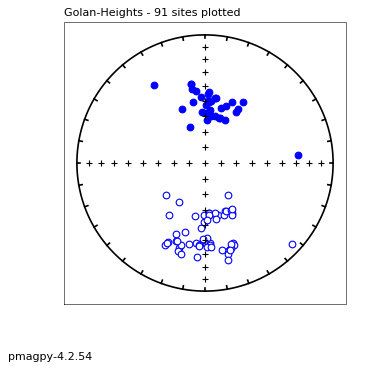

In [26]:
# now we do it for real:
ipmag.eqarea_magic(dir_path=dir_path,save_plots=False)

### Map of virtual geomagnetic poles (VGPs)
- use ipmag.vgpmap_magic() to plot the VGPs from the same data

In [27]:
# get help message for vgpmap_magic
help(ipmag.vgpmap_magic)

Help on function vgpmap_magic in module pmagpy.ipmag:

vgpmap_magic(dir_path='.', results_file='sites.txt', crd='', sym='ro', size=8, rsym='g^', rsize=8, fmt='pdf', res='c', proj='ortho', flip=False, anti=False, fancy=False, ell=False, ages=False, lat_0=0, lon_0=0, save_plots=True, interactive=False, contribution=None, image_records=False)
    makes a map of vgps and a95/dp,dm for site means in a sites table
    
    Parameters
    ----------
    dir_path : str, default "."
        input directory path
    results_file : str, default "sites.txt"
        name of MagIC format sites file
    crd : str, default ""
       coordinate system [g, t] (geographic, tilt_corrected)
    sym : str, default "ro"
        symbol color and shape, default red circles
        (see matplotlib documentation for more color/shape options)
    size : int, default 8
        symbol size
    rsym : str, default "g^"
        symbol for plotting reverse poles
        (see matplotlib documentation for more color/sha

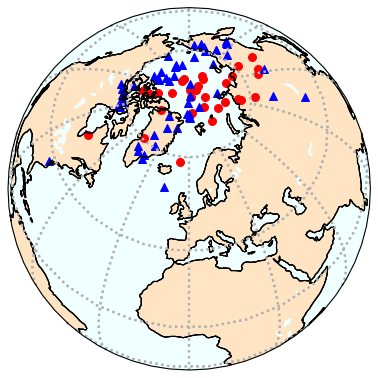

In [28]:
ipmag.vgpmap_magic(dir_path=dir_path,size=50,flip=True,save_plots=False,lat_0=60,rsym='b^',rsize=50)

### Bootstrap reversals test
- use ipmag.reversal_test_bootstrap() to do the reversals test

In [29]:
help(ipmag.reversal_test_bootstrap)

Help on function reversal_test_bootstrap in module pmagpy.ipmag:

reversal_test_bootstrap(dec=None, inc=None, di_block=None, plot_stereo=False, save=False, save_folder='.', fmt='svg')
    Conduct a reversal test using bootstrap statistics (Tauxe, 2010) to
    determine whether two populations of directions could be from an antipodal
    common mean.
    
    Parameters
    ----------
    dec: list of declinations
    inc: list of inclinations
        or
    di_block: a nested list of [dec,inc]
        A di_block can be provided in which case it will be used instead of
        dec, inc lists.
    
    plot_stereo : before plotting the CDFs, plot stereonet with the
        bidirectionally separated data (default is False)
    save : boolean argument to save plots (default is False)
    save_folder : directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 'svg')
    
    Returns
    -------
    plots : Plots of the cumulative d

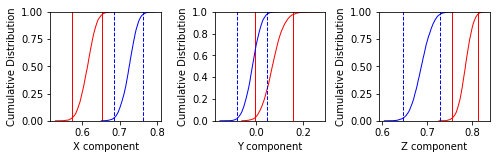

In [30]:
# read in the data into a Pandas DataFrame
sites_df=pd.read_csv(dir_path+'/sites.txt',sep='\t',header=1)
# pick out the declinations and inclinations
decs=sites_df.dir_dec.values
incs=sites_df.dir_inc.values
# call the function
ipmag.reversal_test_bootstrap(dec=decs,inc=incs,plot_stereo=False)

### Make a site map
- use pmagplotlib.plot_map() to make a site map

In [31]:
help(pmagplotlib.plot_map)

Help on function plot_map in module pmagpy.pmagplotlib:

plot_map(fignum, lats, lons, Opts)
    makes a cartopy map  with lats/lons
    Requires installation of cartopy
    
    Parameters:
    _______________
    fignum : matplotlib figure number
    lats : array or list of latitudes
    lons : array or list of longitudes
    Opts : dictionary of plotting options:
        Opts.keys=
            proj : projection [supported cartopy projections:
                pc = Plate Carree
                aea = Albers Equal Area
                aeqd = Azimuthal Equidistant
                lcc = Lambert Conformal
                lcyl = Lambert Cylindrical
                merc = Mercator
                mill = Miller Cylindrical
                moll = Mollweide [default]
                ortho = Orthographic
                robin = Robinson
                sinu = Sinusoidal
                stere = Stereographic
                tmerc = Transverse Mercator
                utm = UTM [set zone and south 

NB: the most recent PmagPy version fixes the scale issue - but it is SLOW at high resolution... so set Opts\['res'\] to 'c' for crude for a quick look.  if you want to be dazzled - set it to 'h' but be prepared to wait for a while...  'i' for intermediate is probably good enough for most purposes (50m resolution)

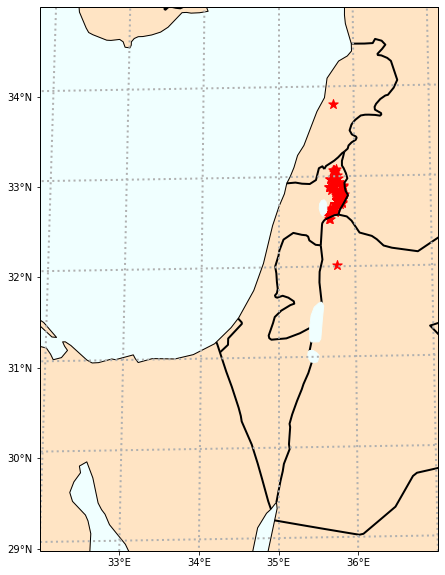

In [32]:
# read in the data file:
site_df=pd.read_csv(dir_path+'/sites.txt',sep='\t',header=1)
# pick out the longitudes and latitudes
lons=site_df['lon'].values
lats=site_df['lat'].values
# set some options
Opts={}
Opts['sym']='r*' # sets the symbol to white dots
Opts['symsize']=100 # sets symbol size to 3 pts
Opts['proj']='lcc' # Lambert Conformal projection
Opts['pltgrid']=True
Opts['lat_0']=33
Opts['lon_0']=35
Opts['latmin']=29
Opts['latmax']=35
Opts['lonmin']=32
Opts['lonmax']=37
Opts['gridspace']=1
Opts['details']={}
Opts['details']['coasts']=True
Opts['details']['ocean']=True
Opts['details']['countries']=True
Opts['global']=False
Opts['res']='i'
plt.figure(1,(10,10)) # optional - make a map

pmagplotlib.plot_map(1, lats, lons, Opts)


## Example 2: 

## Importing MagIC format data from desktop

- make a directory called MagIC\_upload as in the first example. 


In [33]:
# set up the directory structure for this example, if not already present:
dirs=os.listdir('PmagPy_online') # get a list of directories in this one
if 'MagIC_upload' not in dirs:
    os.mkdir("PmagPy_online/MagIC_upload")
    print ('MagIC_upload directory created')
else:
    print ('MagIC_upload directory already exists')
magic_contribution='magic_contribution_16761.txt' # set the file name string  
# move uploaded file to working directory
files=os.listdir()
print (files)
if magic_contribution in files:
    os.rename(magic_contribution, dir_path+'/'+magic_contribution) # move the contribution to the directory

MagIC_upload directory already exists
['example_pypirc', 'PmagPy_iodp_HOLE_template.ipynb', 'MagIC_workshop_demo.ipynb', 'setup_scripts', 'locator', 'SPD', '.DS_Store', 'command_line_setup.py', 'environment.yml', 'bin', 'PmagPy_online.ipynb', 'dist', 'magic_contribution_16960', 'thellier_gui_preferences.json', 'pmagpy.egg-info', 'PmagPy_calculations.ipynb', 'MANIFEST.in', '__pycache__', 'run_all_tests.sh', 'pmag_env', 'data_files', 'README.md', 'programs', 'pmagpy', 'setup.py', 'PmagPy_online', 'pmagpy_cli.egg-info', '.gitignore', 'run_tests.sh', 'CONTRIBUTING.md', 'uninstall_Mac_OSX.app', 'Figures', 'PmagPy_plots_analysis.ipynb', 'PmagPy_MagIC.ipynb', '.github', 'pmagpy_tests', 'PmagPy_introduction.ipynb', 'dialogs', '.ipynb_checkpoints', 'PmagPy-cli.ipynb', 'pip_README.md', 'build', 'extract_results.ipynb', '.git', 'programs_list.py', 'pmag_gui.spec', '.travis.yml', 'help_files', 'magic_gui.spec', 'dev_setup.py', 'make_magic_plots.py']


- download the data from Tauxe et al. (2015; DOI: 10.1016/J.EPSL.2014.12.034; MagIC id:16749) to your desktop.
    - On your laptop search engine:
        - Go to this website: https://www2.earthref.org/MagIC/search
        - Enter the doi on the Search MagIC text entry as: DOI: 10.1016/J.EPSL.2014.12.034
        - Click the Search button to the right
        - Click on Download Results and choose '1 Contribution File' then 'Download Files'. This downloads a zip file with all the results.  Double click on the zip file, then 
- On the jupyterhub site: 
    - upload the file (magic\_contribution\_16761.txt) to the jupyterhub site by:
        - click on Open in the File menu.
        - click on Upload and choose the datafile, then 'Upload' next to the filename. 
        - move the datafile to the MagIC\_upload directory as in the first example:
        - Unpack it with ipmag.download_magic()


In [35]:
dir_path='PmagPy_online/MagIC_upload' # set the path to the correct working directory
magic_id='16761' # set the magic ID number
magic_contribution='magic_contribution_'+magic_id+'.txt' # set the file name string
os.rename(magic_contribution, dir_path+'/'+magic_contribution) # move the contribution to the directory
ipmag.download_magic(magic_contribution,dir_path=dir_path,print_progress=False) # unpack the filev

1  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_upload/contribution.txt
1  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_upload/locations.txt
5943  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_upload/sites.txt
2436  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_upload/samples.txt
2573  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_upload/specimens.txt
4697  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_upload/measurements.txt
60  records written to file  /Users/ltauxe/PmagPy/PmagPy_online/MagIC_upload/ages.txt


True

## Make some plots 

### Magnetostratigraphy

- make a figure with these elements for the interval 40 m to 160 m:
    - magstrat time scale plot from 2 to 7 Ma
    - inclinations (dir\_inc) from the 20mT step in the measurements table  against composite_depth as blue dots
    - inclinations (dir\_inc) from the specimens table against composite depth as red triangles. 
    - put on dotted lines for the GAD inclination
    
- Steps to accomplish this: 
    - read in the data file as a Pandas DataFrame with pd.read_csv().  
    - All MagIC .txt files are tab delimited.  This is indicated with a sep='\t' keywork.  
    - The column headers in the second row, hence (because Python counts from zero), header=1
    - the depth of a particular specimen/site in MagIC is stored in the sites.txt table.  You will have to merge the data from that table into the specimens/measurements tables.  To do that you need to do a few things:
    - you need a common key.  Because the specimen/sample/site names are the same for an IODP record, make a column in the specimen/measurements dataframes labled 'site' that is the same as the specimen.  
    - merge the two dataframes (sites and specimens/measurements) with pd.merge()


In [36]:
depth_min, depth_max= 40, 160 # set the core depth bounds as required
# read in the required data tables:
meas_df=pd.read_csv(dir_path+'/measurements.txt',sep='\t',header=1)
site_df=pd.read_csv(dir_path+'/sites.txt',sep='\t',header=1)
spec_df=pd.read_csv(dir_path+'/specimens.txt',sep='\t',header=1)
ages_df=pd.read_csv(dir_path+'/ages.txt',sep='\t',header=1)
# filter the ages table for method codes that indicate paleomagnetic reversals:
ages_df=ages_df[ages_df['method_codes'].str.contains('PMAG')]
# filter the measurements for the 20 mT (.02 T) step
meas_df.dropna(subset=['treat_ac_field'],inplace=True)
meas_20mT=meas_df[meas_df['treat_ac_field']==0.02] 
# make the site key in the measurements and specimens dataframes
meas_20mT['site']=meas_20mT['specimen']
spec_df['site']=spec_df['specimen']
# we only want the core depth out of the sites dataframe, so we can pare it down like this:
depth_df=site_df[['site','core_depth']]
# merge the specimen, depth dataframes
spec_df=pd.merge(spec_df,depth_df,on='site')
# merge the measurements, depth dataframes
meas_20mT=pd.merge(meas_20mT,depth_df,on='site')
# filter for the desired depth range: 
spec_df=spec_df[(spec_df['core_depth']>depth_min)&(spec_df['core_depth']<depth_max)]
meas_20mT=meas_20mT[(meas_20mT['core_depth']>depth_min)&(meas_20mT['core_depth']<depth_max)]
# note that the age table has only height (not depth), so these numbers are the opposite
ages_df=ages_df[(ages_df['tiepoint_height']<-depth_min)&(ages_df['tiepoint_height']>-depth_max)]
# get the site latitude (there is only one)
lat=site_df['lat'].unique()[0]



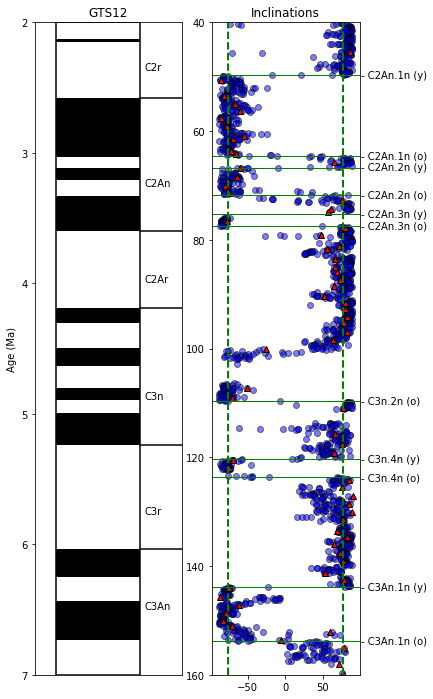

In [37]:
fig=plt.figure(1,(9,12)) # make the figure
ax1=fig.add_subplot(131) # make the first of three subplots
pmagplotlib.plot_ts(ax1,2,7,timescale='gts12') # plot on the time scale
ax2=fig.add_subplot(132) # make the second of three subplots
plt.plot(meas_20mT.dir_inc,meas_20mT.core_depth,'bo',markeredgecolor='black',alpha=.5)
plt.plot(spec_df.dir_inc,spec_df.core_depth,'r^',markeredgecolor='black')

plt.ylim(depth_max,depth_min)
# calculate the geocentric axial dipole field for the site latitude
gad=pmag.pinc(lat) # tan (I) = 2 tan (lat)
# put it on the plot as a green dashed line
plt.axvline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axvline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.title('Inclinations')
pmagplotlib.label_tiepoints(ax2,100,ages_df.tiepoint.values,-1*ages_df.tiepoint_height.values,lines=True)
#

## Anisotropy of magnetic susceptibilty versus depth

- use ipmag.ani_depthplot to plot the anisotropy data against depth in the Hole.  


### Plotting anisotropy data versus depth (the "Christmas tree" of anisotropy)
- use ipmag.ani\_depthplot()

In [38]:
help(ipmag.ani_depthplot)

Help on function ani_depthplot in module pmagpy.ipmag:

ani_depthplot(spec_file='specimens.txt', samp_file='samples.txt', meas_file='measurements.txt', site_file='sites.txt', age_file='', sum_file='', fmt='svg', dmin=-1, dmax=-1, depth_scale='core_depth', dir_path='.', contribution=None)
    returns matplotlib figure with anisotropy data plotted against depth
    available depth scales: 'composite_depth', 'core_depth' or 'age' (you must provide an age file to use this option).
    You must provide valid specimens and sites files, and either a samples or an ages file.
    You may additionally provide measurements and a summary file (csv).
    
    Parameters
    ----------
    spec_file : str, default "specimens.txt"
    samp_file : str, default "samples.txt"
    meas_file : str, default "measurements.txt"
    site_file : str, default "sites.txt"
    age_file : str, default ""
    sum_file : str, default ""
    fmt : str, default "svg"
        format for figures, ["svg", "jpg", "pdf", "

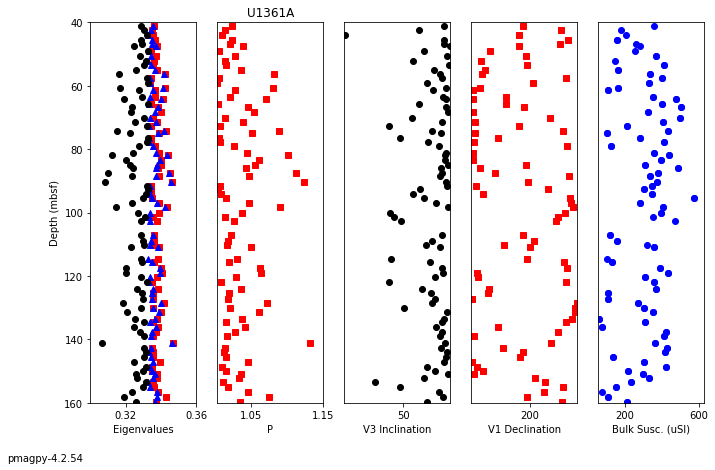

In [39]:
depth_min,depth_max=40,160
ipmag.ani_depthplot(dir_path=dir_path,dmin=depth_min,dmax=depth_max);

### Plotting companion data to the magnetic data using the external_results column in MagIC
- ipmag.ani_depthplot() reads in a specimen file with the column aniso_s filled in and calculates the eigenvalues for you. in this exercise, you learn to calculate anisotropy eigenvalues from the aniso_s column in the specimens table yourself,
-  plot anisotropy eigenvalues and the natural gamma radiation values from U1361A between 40 and 160 meters below sea floor

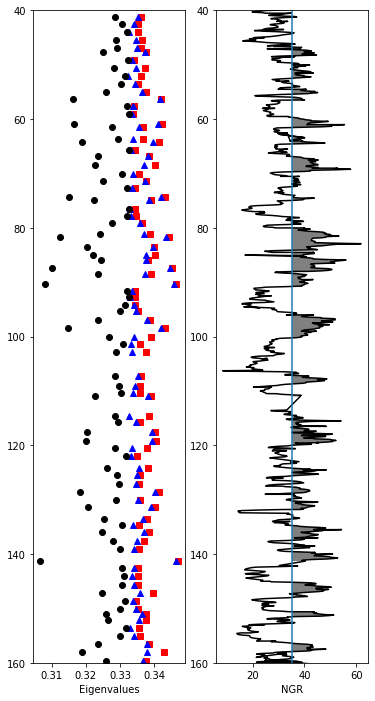

In [40]:
depth_min, depth_max= 40, 160 # set the core depth bounds as required
# read in the data files and filter for desired columns
site_df=pd.read_csv(dir_path+'/sites.txt',sep='\t',header=1)
site_df=site_df[['site','core_depth','external_results']]

anis_df=pd.read_csv(dir_path+'/specimens.txt',sep='\t',header=1)
anis_df['site']=anis_df['specimen']
anis_df.dropna(subset=['aniso_v1'],inplace=True)
# merge with sites and filter for the depth
anis_df=pd.merge(anis_df,site_df,on='site')
anis_df=anis_df[(anis_df.core_depth>depth_min)&(anis_df.core_depth<depth_max)]


# unpack the eigenparameters from aniso_v1,aniso_v2 and aniso_v3 and pick out the eigenvalues
anis_df['tau1']=anis_df['aniso_v1'].str.split(':',expand=True)[0].astype('float').values
anis_df['tau2']=anis_df['aniso_v2'].str.split(':',expand=True)[0].astype('float').values
anis_df['tau3']=anis_df['aniso_v3'].str.split(':',expand=True)[0].astype('float').values

# unpack external results data
site_df['ngr']=site_df['external_results'].str.split(':',expand=True)[1].astype('float').values

# make the plots


fig=plt.figure(1,(6,12)) # make the figure
ax1=fig.add_subplot(121) # make the first of two subplots
ax2=fig.add_subplot(122) # make the second of two subplots

# plot the eigenvalues with the usual symbols
ax1.plot(anis_df['tau1'],anis_df['core_depth'],'rs') # red square
ax1.plot(anis_df['tau2'],anis_df['core_depth'],'b^') # blue triangle
ax1.plot(anis_df['tau3'],anis_df['core_depth'],'ko') # black circle
ax1.set_ylim(depth_max,depth_min) # set the y axis limits
ax1.set_xlabel('Eigenvalues')

# plot the ngr data as a black line
ax2.plot(site_df['ngr'],site_df['core_depth'],'k-')
ax2.set_ylim(depth_max,depth_min) # set the y axis limits
# shade in the high NGR regions - these are the clay dominated layers with higher anisotropy
y2=np.ones(len(site_df['ngr']))*site_df['ngr'].median()
plt.fill_betweenx(site_df['core_depth'],site_df['ngr'], y2,\
                  where = site_df['ngr']>=y2, facecolor='grey')
ax2.axvline(site_df['ngr'].median()) # draw a vertical line up the median values
ax2.set_xlabel('NGR'); # label the X axis





## Example 4

### PmagPy for getting geomagnetic vectors from IGRF like tables

- use pmag.pinc() to calculate the geocentric axial dipole (GAD) inclination for a  particular latitude (e.g., 33)
- use ipmag.igrf() and ipmag.igrf\_print() to get values of the field for a specific place (e.g., San Diego at lon=-117,lat=33,alt=0) and date (2019)
- make a plot of declination, inclination, field strength (B) for a specific place and range of dates
- use pmag.do\_mag_map() and pmagplotlib.plot\_mag\_map() to make a map of the field at a specific date (2019)
- make a movie of the field for the last 1000 years using the cals10k.2 model of Constable et al. (2016; [http://dx.doi.org/10.1016/j.epsl.2016.08.015](http://dx.doi.org/10.1016/j.epsl.2016.08.015))


In [41]:
help(pmag.pinc)

Help on function pinc in module pmagpy.pmag:

pinc(lat)
    calculate paleoinclination from latitude using dipole formula: tan(I) = 2tan(lat)
    Parameters
    ________________
    
    lat : either a single value or an array of latitudes
    
    Returns
    -------
    
    array of inclinations



In [42]:
gad_inc=pmag.pinc(33)
print(gad_inc)

52.406157522519074


In [43]:
help(ipmag.igrf)

Help on function igrf in module pmagpy.ipmag:

igrf(input_list, mod='', ghfile='')
    Determine Declination, Inclination and Intensity from the IGRF model.
    (http://www.ngdc.noaa.gov/IAGA/vmod/igrf.html)
    
    Parameters
    ----------
    input_list : list with format [Date, Altitude, Latitude, Longitude]
        date must be in decimal year format XXXX.XXXX (Common Era)
        altitude is in kilometers
    mod :  desired model
        "" : Use the IGRF
        custom : use values supplied in ghfile
        or choose from this list
        ['arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b','shadif14','shawq2k','shawqIA']
        where:
            arch3k (Korte et al., 2009)
            cals3k (Korte and Constable, 2011)
            cals10k.1b (Korte et al., 2011)
            pfm9k  (Nilsson et al., 2014)
            hfm10k is the hfm.OL1.A1 of Constable et al. (2016)
            cals10k.2 (Constable et al., 2016)
            shadif14 (Pavon-Carrasco et al., 2014)
  

In [44]:
date,lat,lon,alt=2019.9,33,-117,0 # set variables for ipmag.igrf
local=ipmag.igrf([date, alt, lat, lon]) # get the local field vector
ipmag.igrf_print(local) # format for nice printing

Declination: 11.376
Inclination: 58.140
Intensity: 46239.890 nT


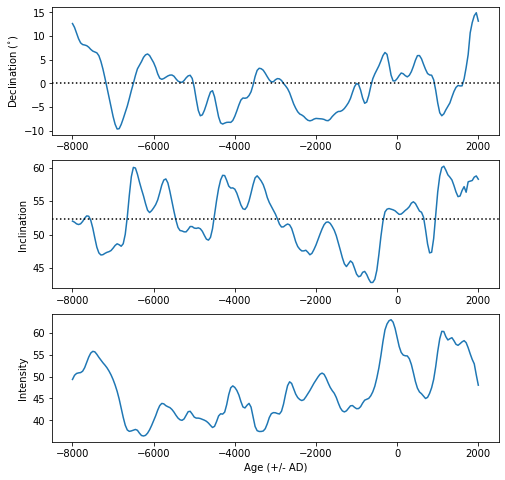

In [45]:
mod='cals10k.2' # set model to Constable et al. (2016) cals10k.2
lat,lon,alt=33,-117,0  # set location information
gad_inc=pmag.pinc(lat) # get the GAD inclination at the latitude
dates=range(-8000,2050,50) # get a list of desired dates
local_vectors=[] # make a container to put the vectors in
for d in dates: # step through the date list
    local=ipmag.igrf([d, alt, lat, lon],mod=mod) # get the vector at that place and time
    local_vectors.append([d,local[0],local[1],local[2]]) # append it to the container of field vectors
df=pd.DataFrame(local_vectors,columns=['Date','Dec','Inc','B_nT']) # make a Pandas DataFrame
df['B_uT']=df['B_nT']*1e-3 # convert from nanotesla to microtesla
df.loc[df['Dec']>180,'Dec']=df['Dec']-360. # make declinations centered around 0 
fig=plt.figure(1,(8,8)) # make a figure object
ax1=fig.add_subplot(311) # add subplots (3 rows, one column, plot 1)
ax2=fig.add_subplot(312) # plot 2
ax3=fig.add_subplot(313) # plot 3
ax1.plot(df['Date'],df['Dec']) # plot declination against date
ax1.axhline(0,color='black',linestyle='dotted') # make a horizontal black line at 0
ax2.plot(df['Date'],df['Inc']) # plot inclination against date
ax2.axhline(gad_inc,color='black',linestyle='dotted')
ax3.plot(df['Date'],df['B_uT']) # plot microtesla against date
ax1.set_ylabel(r'Declination ($^{\circ}$)') # y label on plot 1
ax2.set_ylabel('Inclination')# y label on plot 2
ax3.set_ylabel('Intensity')# y label on plot 3
ax3.set_xlabel('Age (+/- AD)'); # x label on bottom plot (3)

In [46]:
help(pmag.do_mag_map)

Help on function do_mag_map in module pmagpy.pmag:

do_mag_map(date, lon_0=0, alt=0, file='', mod='cals10k', resolution='low')
    returns lists of declination, inclination and intensities for lat/lon grid for
    desired model and date.
    
    Parameters:
    _________________
    date = Required date in decimal years (Common Era, negative for Before Common Era) - NB: only dates prior to 2020 supported
    
    Optional Parameters:
    ______________
    mod  = model to use ('arch3k','cals3k','pfm9k','hfm10k','cals10k.2','shadif14k','cals10k.1b','custom')
    file = l m g h formatted filefor custom model
    lon_0 : central longitude for Hammer projection
    alt  = altitude
    resolution = ['low','high'] default is low
    
    Returns:
    ______________
    Bdec=list of declinations
    Binc=list of inclinations
    B = list of total field intensities in nT
    Br = list of radial field intensities
    lons = list of longitudes evaluated
    lats = list of latitudes evaluated



In [47]:
help(pmagplotlib.plot_mag_map)

Help on function plot_mag_map in module pmagpy.pmagplotlib:

plot_mag_map(fignum, element, lons, lats, element_type, cmap='coolwarm', lon_0=0, date='', contours=False, proj='PlateCarree', min=False, max=False)
    makes a color contour map of geomagnetic field element
    
    Parameters
    ____________
    fignum : matplotlib figure number
    element : field element array from pmag.do_mag_map for plotting
    lons : longitude array from pmag.do_mag_map for plotting
    lats : latitude array from pmag.do_mag_map for plotting
    element_type : [B,Br,I,D] geomagnetic element type
        B : field intensity
        Br : radial field intensity
        I : inclinations
        D : declinations
    Optional
    _________
    contours : plot the contour lines on top of the heat map if True
    proj : cartopy projection ['PlateCarree','Mollweide']
           NB: The Mollweide projection can only be reliably with cartopy=0.17.0; otherwise use lon_0=0.  Also, for declinations, PlateCarree is

In [48]:
# define some useful parameters
date,mod,lon_0,alt,ghfile=2019,'cals10k.2',0,0,"" # only date is required
Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,alt=alt,file=ghfile) # get the global data

In [49]:
help(pmagplotlib.plot_mag_map)

Help on function plot_mag_map in module pmagpy.pmagplotlib:

plot_mag_map(fignum, element, lons, lats, element_type, cmap='coolwarm', lon_0=0, date='', contours=False, proj='PlateCarree', min=False, max=False)
    makes a color contour map of geomagnetic field element
    
    Parameters
    ____________
    fignum : matplotlib figure number
    element : field element array from pmag.do_mag_map for plotting
    lons : longitude array from pmag.do_mag_map for plotting
    lats : latitude array from pmag.do_mag_map for plotting
    element_type : [B,Br,I,D] geomagnetic element type
        B : field intensity
        Br : radial field intensity
        I : inclinations
        D : declinations
    Optional
    _________
    contours : plot the contour lines on top of the heat map if True
    proj : cartopy projection ['PlateCarree','Mollweide']
           NB: The Mollweide projection can only be reliably with cartopy=0.17.0; otherwise use lon_0=0.  Also, for declinations, PlateCarree is

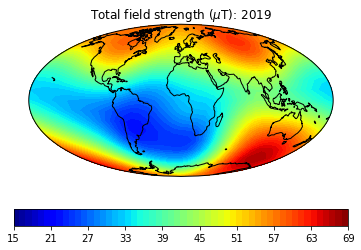

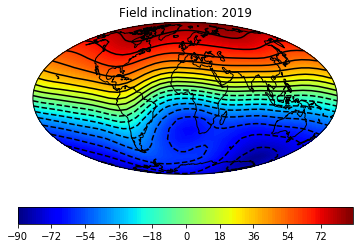

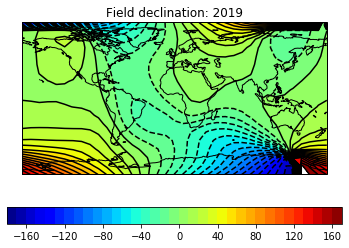

In [50]:
cmap='jet' # nice color map for contourf
pmagplotlib.plot_mag_map(1,Bs,lons,lats,'B',cmap=cmap,date=date,proj='Mollweide',contours=False) # plot the field strength
pmagplotlib.plot_mag_map(2,Is,lons,lats,'I',cmap=cmap,date=date,proj='Mollweide',contours=True)# plot the inclination
pmagplotlib.plot_mag_map(3,Ds,lons,lats,'D',cmap=cmap,date=date,contours=True);# plot the declination    


In [18]:
dirs=os.listdir('PmagPy_online') # get a list of directories in this one
if 'PmagPy_for_Geomag' not in dirs:
    os.mkdir("PmagPy_online/PmagPy_for_Geomag")
    print ('PmagPy_for_Geomag directory created')
else:
    print ('PmagPy_for_Geomag directory already exists')


PmagPy_for_Geomag directory created


figure saved as:  Intensity_0001.png
figure saved as:  Intensity_0002.png
figure saved as:  Intensity_0003.png
figure saved as:  Intensity_0004.png
figure saved as:  Intensity_0005.png
figure saved as:  Intensity_0006.png
figure saved as:  Intensity_0007.png


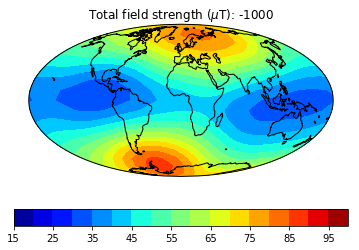

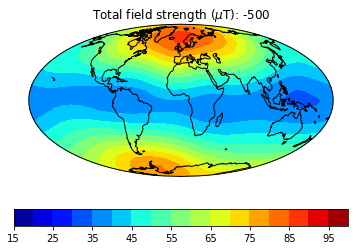

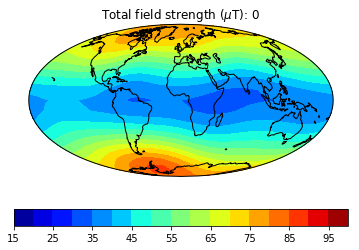

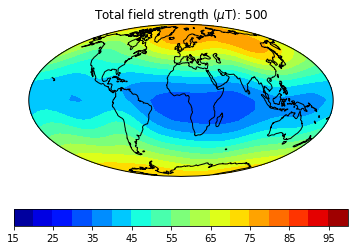

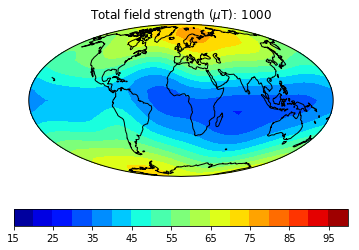

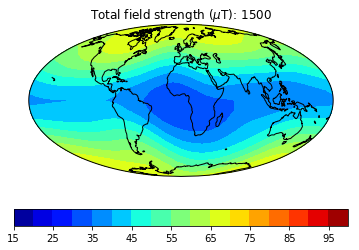

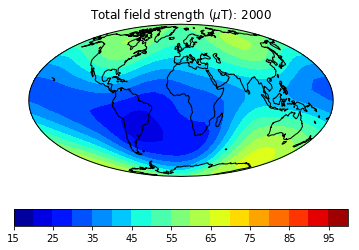

In [19]:
dir_path='PmagPy_Online/PmagPy_for_Geomag' # set the directory path name
files=os.listdir(dir_path) # get a list of the directory
for f in files:
    if '.png' in f:os.remove(dir_path+'/'+f) # delete all the existing .png files in that directory
mod,lon_0,alt,ghfile='cals10k.2',0,0,"" # define the variables 
cmap,title='jet','Intensity' # nice color map for contourf
fignum=1
dates=range(-1000,2100,500) # make maps for these years.  
# to make a high resolution, smooth movie, uncomment this line
#dates=range(-1000,2100,50) # make maps for these years.  
lon_0=0 # center the maps at the Greenwich meridian
element='B' # let's do field strength
for date in dates:  # step through the loop

    Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,alt=alt,file=ghfile)
    pmagplotlib.plot_mag_map(fignum,Bs,lons,lats,'B',cmap=cmap,date=date,proj='Mollweide',
                             min=15,max=100,contours=False) # plot the field strength
    figstr=str(fignum)
    while len(figstr)<4:figstr='0'+figstr
    
    plt.savefig(dir_path+'/' +title.strip()+'_'+figstr+'.png') # saves the  figure. to a folder
    fignum+=1
    print ('figure saved as: ',title.strip()+'_'+figstr+'.png')

Now we can make the animated gif from these png files

In [23]:
filenames=sorted(os.listdir('PmagPy_Online/PmagPy_for_Geomag')) # listing of the directory
images = [] # make a container to put the image files in
for file in filenames: # step through all the maps
    if '.png' in file: # skip some of the nasty hidden files
        filename='PmagPy_Online/PmagPy_for_Geomag/'+file # make filename from the folder name and the file name
        images.append(imageio.imread(filename)) # read it in and stuff in the container
kargs={ 'duration':.3} # .3 second delay between frames
imageio.mimsave('PmagPy_Online/PmagPy_for_Geomag/Bmovie.gif', images,'GIF',**kargs) # save to an animated gif.  

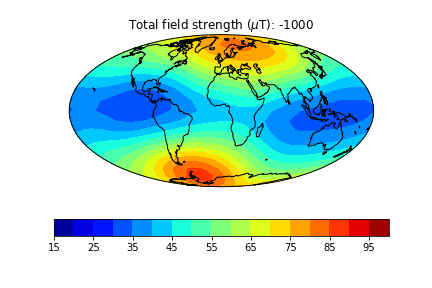

In [25]:
Image(filename="PmagPy_Online/PmagPy_for_Geomag/Bmovie.gif")

Here is an example of one done  at higher temporal resolution.
You can do this too if you have the patience (perhaps not when dozens of other folks are using the jupyter-hub at the same time!  

just uncomment this line in the map making code cell above:

dates=range(-1000,2100,50) # make maps for these years.  

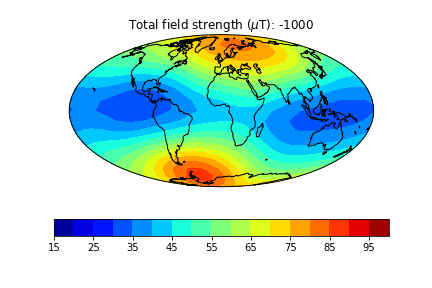

In [27]:
Image(filename="PmagPy_Online/PmagPy_for_Geomag/BigMovie.gif")